In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#Loading in the data from the second parameterization
#i.e. Abbott II
#see http://irfu.cea.fr/dphn/T20/Parametrisations/param02.php
abbott_ii = np.loadtxt('input_files/abbott_ii.txt', delimiter = '\t').T
abbott_ii_q2 = (abbott_ii[0]/5.068)**2
abbott_ii_gc = abbott_ii[1]
abbott_ii_gq = abbott_ii[2]
abbott_ii_gm = abbott_ii[3]

In [3]:
#Kiwi Parameterization
def kiwi_fit(G_0, Q_0):
    
    def fitting_function(Q2, a, b, c, d, e):
        Q_fm = np.sqrt(Q2)*(5.068) #Q in fm^-1

        poly = (1+a*Q_fm**2)*(1+b*Q_fm**2)*(1+c*Q_fm**2)*(1+d*Q_fm**2)*(1+e*Q_fm**2)
        
        return G_0 * (1. - np.power((Q_fm/Q_0),2)) * (1./poly)
    return fitting_function

In [4]:
#Abbott Parameterization
def abbott_fit(G_0, Q_0):
    
    def fitting_function(Q2, a, b, c, d, e):
        Q_fm = np.sqrt(Q2)*(5.068) #Q in fm^-1

        poly = (1+a*Q_fm**2+b*Q_fm**4+c*Q_fm**6+d*Q_fm**8+e*Q_fm**10)
        
        return G_0 * (1. - np.power((Q_fm/Q_0),2)) * (1./poly)
    
    return fitting_function

In [5]:
#Plotting Function
def my_plot(q2, g, q2e, kiwi, abbott, error, ff):
    #Creating a new matplotlib.pyplot figure
    plt.rcParams.update({'font.size': 24})
    plt.figure(figsize = (16,9))
    plt.xlabel('$Q^2$ [$GeV^2$]', fontsize = 'x-large')
    plt.ylabel('${}$ Form Factor'.format(ff), fontsize = 'x-large')
    plt.yscale('log')
    plt.xlim(0, 2)
    plt.tick_params('both', which = 'both', length = 12, width = 2)

    #Scatter plotting the experimental data
    plt.errorbar(q2, np.abs(g), yerr = error, fmt = 'kh', ms = 10, label = 'Data')

    #Plotting the new fit function
    plt.plot( q2e, np.abs(kiwi), color = 'black', lw = 4, label = 'Kiwi Fit', zorder = 1)

    #Plotting the Abbott I fit function
    plt.plot( q2e, np.abs(abbott), color = 'dimgray', ls = '--', lw = 4, label = 'Abbott Fit I', zorder = 0)

    #Plotting the Abbott II fit function
    if( ff == 'G_C' ):
        abbott_ii_current = abbott_ii_gc
    elif( ff == 'G_M' ):
        abbott_ii_current = abbott_ii_gm
    else:
        abbott_ii_current = abbott_ii_gq
    plt.plot( abbott_ii_q2, np.abs(abbott_ii_current), color = 'dimgray', ls = ':', lw = 4, label = 'Abbott Fit II', zorder = -1)

    #Creating the legend
    plt.legend(loc = 'upper right', frameon = False)

    plt.savefig('output_files/{}_parameterization_weighted.png'.format(ff.lower()),
                bbox_inches = 'tight')

[0.02708986 0.54510802 0.02708986 0.02708142 0.02708986]


C:\Users\lamor\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


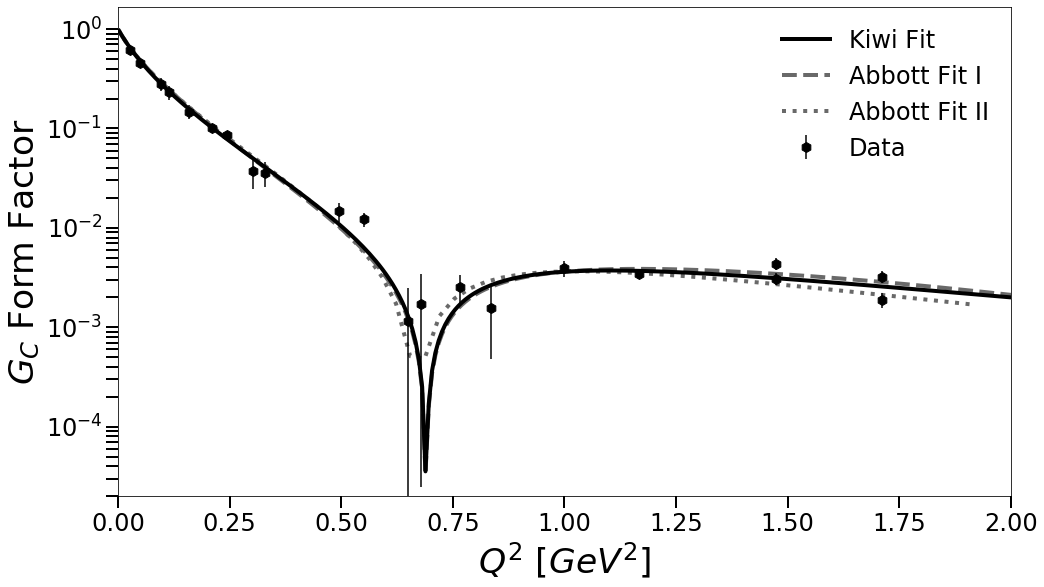

In [6]:
#Importing the experimental data
g_c_data = np.loadtxt('input_files/GC_Data.txt')
Q2 = g_c_data[:, 0]
GC = g_c_data[:, 1]
GC_error_hi = g_c_data[:, 2]
GC_error_lo = g_c_data[:, 3]

Q2_initial = Q2[0] - 1
Q2_final = Q2[-1] + 1

#Creating a function to fit the data to
# G_0 = 1, Q_0 = 4.21
g_c_kiwi = kiwi_fit( 1., 4.21 )

#Fitting the data using the Scipy.optimize function curve_fit
#Bounding the parameters to being 0 <=
#Error using only the upper errors
popt, pcov = curve_fit(g_c_kiwi, Q2, GC, bounds = (0,np.inf), sigma = GC_error_hi)
print(popt)

#Using the fitted function to extend the range
kiwi_Q2 = np.linspace(Q2_initial, Q2_final, 500)
kiwi_GC = g_c_kiwi(kiwi_Q2, *popt)

#Repeating for the Abbott fit
g_c_abbott = abbott_fit( 1., 4.21 )

abbott_Q2 = np.linspace(Q2_initial, Q2_final, 500)
abbott_param = (6.740E-01, 2.246E-02, 9.806E-03, -2.709E-04, 3.793E-06)
abbott_GC = g_c_abbott(abbott_Q2, *abbott_param)

my_plot(Q2, GC, kiwi_Q2, kiwi_GC, abbott_GC, GC_error_hi, 'G_C')

[0.04249515 0.04249517 0.0013469  0.04250929 0.51344307]


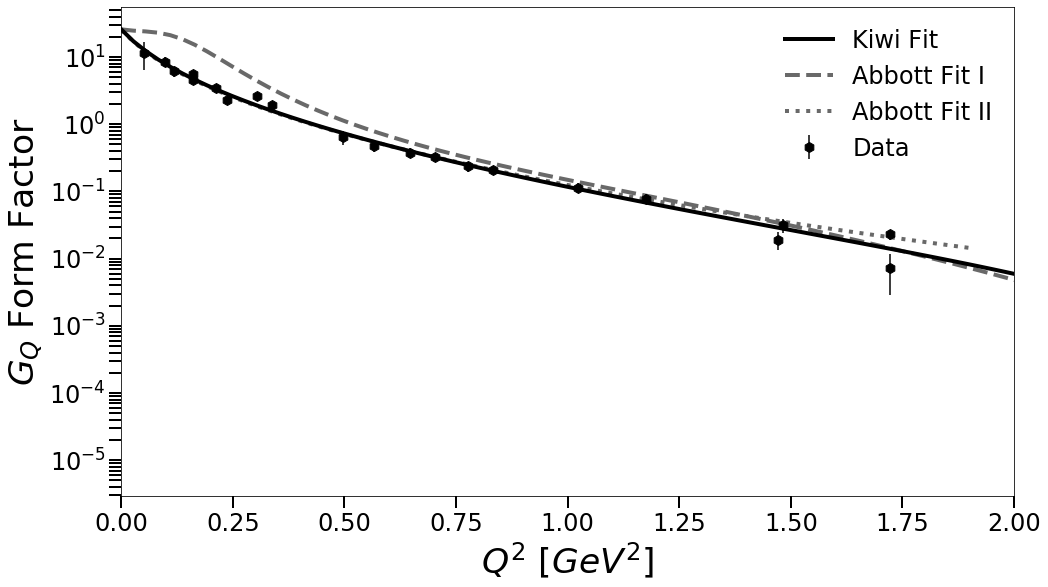

In [7]:
#Importing the experimental data
g_q_data = np.loadtxt('input_files/GQ_Data.txt')
Q2 = g_q_data[:, 0]
GQ = g_q_data[:, 1]
GQ_error_hi = g_q_data[:, 2]
GQ_error_lo = g_q_data[:, 3]

Q2_initial = 0
Q2_final = Q2[-1] + 1

#Creating a function to fit the data to
# G_0 = 5.83, Q_0 = 8.1
g_q_kiwi = kiwi_fit( 25.83, 8.1 )

#Fitting the data using the Scipy.optimize function curve_fit
#Bounding the parameters to being 0 <=
#Error using only the upper errors
popt, pcov = curve_fit( g_q_kiwi, Q2, GQ, bounds = (0,np.inf), sigma = GQ_error_hi )
print(popt)

#Using the fitted function to extend the range
kiwi_Q2 = np.linspace(Q2_initial, Q2_final, 100)
kiwi_GQ = g_q_kiwi(kiwi_Q2, *popt)

#Repeating for the Abbott fit
g_q_abbott = abbott_fit( 25.83, 8.1 )

abbott_Q2 = np.linspace(Q2_initial, Q2_final, 100)
abbott_param = (.796E-01, -5.656E-02, 1.933E-02, -6.734E-04, 9.438E-06)
abbott_GQ = g_q_abbott(abbott_Q2, *abbott_param)

my_plot(Q2, GQ, kiwi_Q2, kiwi_GQ, abbott_GQ, GQ_error_hi, 'G_Q')

[0.03189419 0.03189573 0.4433256  0.03189394 0.0318955 ]


C:\Users\lamor\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


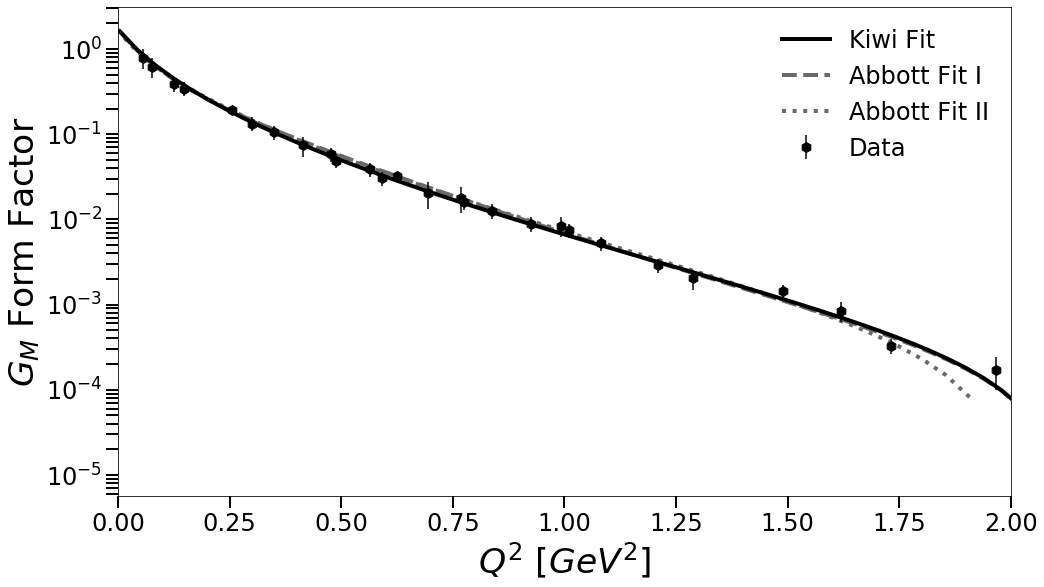

In [8]:
#Importing the experimental data
g_m_data = np.loadtxt('input_files/GM_Data.txt')
Q2 = g_m_data[:, 0]
GM = g_m_data[:, 1]
GM_error_hi = g_m_data[:, 2]
GM_error_lo = g_m_data[:, 3]

Q2_initial = Q2[0] - 1
Q2_final = Q2[-1] + 1

#Creating a function to fit the data to
# G_0 = 1.714, Q_0 = 7.37
g_m_kiwi = kiwi_fit( 1.714, 7.37 )

#Fitting the data using the Scipy.optimize function curve_fit
#Bounding the parameters to being 0 <=
#Error using only the upper errors
popt, pcov = curve_fit( g_m_kiwi, Q2, GM, bounds = (0,np.inf), sigma = GM_error_hi )
print(popt)

#Using the fitted function to extend the range
kiwi_Q2 = np.linspace(Q2_initial, Q2_final, 100)
kiwi_GM = g_m_kiwi(kiwi_Q2, *popt)

#Repeating for the Abbott fit
g_m_abbott = abbott_fit( 1.714, 7.37 )

abbott_Q2 = np.linspace(Q2_initial, Q2_final, 100)
abbott_param = (5.804E-01, 8.701E-02, -3.624E-03, 3.448E-04, -2.818E-06)
abbott_GM = g_m_abbott(abbott_Q2, *abbott_param)

my_plot(Q2, GM, kiwi_Q2, kiwi_GM, abbott_GM, GM_error_hi, 'G_M')

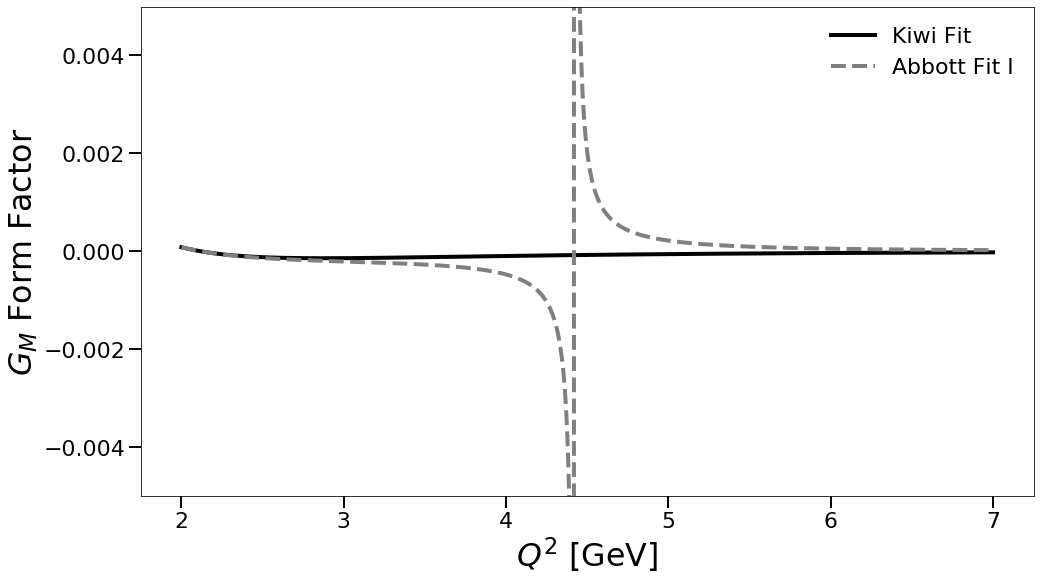

In [9]:
#Importing the experimental data
g_m_data = np.loadtxt('input_files/GM_Data.txt')
Q2 = g_m_data[:, 0]
GM = g_m_data[:, 1]
GM_error_hi = g_m_data[:, 2]
GM_error_lo = g_m_data[:, 3]

Q2_initial = 2
Q2_final = 7

#Creating a function to fit the data to
# G_0 = 1.714, Q_0 = 7.37
g_m_kiwi = kiwi_fit( 1.714, 7.37 )

#Fitting the data using the Scipy.optimize function curve_fit
#Bounding the parameters to being 0 <=
#Error using only the upper errors
popt, pcov = curve_fit( g_m_kiwi, Q2, GM, bounds = (0,np.inf), sigma = GM_error_hi )

#Using the fitted function to extend the range
kiwi_Q2 = np.linspace(Q2_initial, Q2_final, 1000)
kiwi_GM = g_m_kiwi(kiwi_Q2, *popt)

#Repeating for the Abbott fit
g_m_abbott = abbott_fit( 1.714, 7.37 )

abbott_Q2 = np.linspace(Q2_initial, Q2_final, 1000)
abbott_param = (5.804E-01, 8.701E-02, -3.624E-03, 3.448E-04, -2.818E-06)
abbott_GM = g_m_abbott(abbott_Q2, *abbott_param)

#Creating a new matplotlib.pyplot figure
plt.rcParams.update({'font.size': 22})
plt.figure(figsize = (16,9))
plt.xlabel('$Q^2$ [$GeV^2$]', fontsize = 'x-large')
plt.ylabel('$G_M$ Form Factor', fontsize = 'x-large')
plt.xlabel('$Q^2$ [GeV]')
plt.ylim(-0.005, 0.005)
plt.tick_params('both', which = 'both', length = 12, width = 2)

#Scatter plotting the experimental data
#plt.scatter(Q2, GM, color = 'black', marker = 'h', label = 'Data')

#Plotting the new fit function
plt.plot( kiwi_Q2, kiwi_GM, color = 'black', lw = 4, label = 'Kiwi Fit')

#Plotting the Abbott fit function
plt.plot( abbott_Q2, abbott_GM, color = 'gray', ls = '--', lw = 4, label = 'Abbott Fit I')

#Creating the legend
plt.legend(loc = 'upper right', frameon = False)

plt.savefig('output_files/g_m_parameterization_POSTER_SINGULARITY.png',
            bbox_inches = 'tight')